# Introduction
- Name: Izzan Dienurrahman
- Batch: HCK-003

# Objective
- Membuat model klasifikasi menggunakan Logistic Regression dan SVM untuk memprediksi income bracket.

# Problem Statements
- Meload dataset 
- Mengidentifikasi fitur/kolom yang kiranya berkaitan terhadap income bracket.
- Mengidentifikasi distribusi kolom-kolom pada dataset
- Menghandle missing value dan outlier.
- Mempreprocess data sebelum proses training.
- Mengevaluasi model.
- Menyimpan model.

# SQL Command

>SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week,native_country, income_bracket FROM `bigquery-public-data.ml_datasets.census_adult_income` WHERE hours_per_week < 100 and workclass != ' ?' LIMIT 5988

# Import Library

In [33]:
# import library yang dibutuhkan
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
import pandas as pd
import numpy  as np
import seaborn as sns; sns.set()
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

# Data Loading

In [34]:
# set max display column
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [35]:
df = pd.read_csv('h8dsft_P1G2_Izzan.csv') # read csv insurance

In [36]:
df.head(10) # menampilkan 10 data teratas

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,27,Private,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
1,47,Self-emp-not-inc,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,90,United-States,<=50K
2,29,Private,HS-grad,9,Married-AF-spouse,Transport-moving,Husband,White,Male,0,0,80,United-States,<=50K
3,26,Private,HS-grad,9,Married-AF-spouse,Sales,Husband,White,Male,0,0,55,United-States,<=50K
4,30,Private,HS-grad,9,Married-AF-spouse,Adm-clerical,Husband,White,Male,0,0,60,United-States,<=50K
5,35,Private,HS-grad,9,Married-AF-spouse,Other-service,Wife,White,Female,0,0,40,United-States,>50K
6,43,Private,HS-grad,9,Married-AF-spouse,Craft-repair,Wife,Black,Female,0,0,42,United-States,>50K
7,32,Private,HS-grad,9,Married-AF-spouse,Other-service,Other-relative,White,Female,0,0,10,United-States,<=50K
8,19,Private,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K
9,38,Private,HS-grad,9,Married-AF-spouse,Other-service,Wife,White,Female,0,0,25,United-States,<=50K


In [37]:
df.tail(10) # menampilkan 10 data terbawah

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
5978,35,Private,Some-college,10,Separated,Other-service,Unmarried,White,Female,0,0,25,United-States,<=50K
5979,33,Private,Some-college,10,Separated,Other-service,Unmarried,Black,Female,0,0,25,United-States,<=50K
5980,48,Private,Some-college,10,Separated,Other-service,Not-in-family,White,Female,0,0,25,Peru,<=50K
5981,20,Private,Some-college,10,Separated,Other-service,Own-child,White,Female,0,0,30,United-States,<=50K
5982,27,State-gov,Some-college,10,Separated,Other-service,Not-in-family,White,Female,0,0,30,United-States,<=50K
5983,33,Private,Some-college,10,Separated,Other-service,Not-in-family,White,Female,0,0,30,United-States,<=50K
5984,39,State-gov,Some-college,10,Separated,Exec-managerial,Unmarried,Black,Female,0,0,30,United-States,<=50K
5985,29,Private,Some-college,10,Separated,Priv-house-serv,Not-in-family,White,Female,0,0,30,Guatemala,<=50K
5986,25,Private,Some-college,10,Separated,Priv-house-serv,Other-relative,White,Female,0,0,30,El-Salvador,<=50K
5987,60,Private,Some-college,10,Separated,Transport-moving,Not-in-family,Amer-Indian-Eskimo,Female,0,0,30,United-States,<=50K


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5988 entries, 0 to 5987
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5988 non-null   int64 
 1   workclass       5988 non-null   object
 2   education       5988 non-null   object
 3   education_num   5988 non-null   int64 
 4   marital_status  5988 non-null   object
 5   occupation      5988 non-null   object
 6   relationship    5988 non-null   object
 7   race            5988 non-null   object
 8   sex             5988 non-null   object
 9   capital_gain    5988 non-null   int64 
 10  capital_loss    5988 non-null   int64 
 11  hours_per_week  5988 non-null   int64 
 12  native_country  5988 non-null   object
 13  income_bracket  5988 non-null   object
dtypes: int64(5), object(9)
memory usage: 655.1+ KB


Terdapat 5988 entri data, sekilas tidak ada standard missing values. Untuk type juga datanya sudah sesuai bagi kolom yang numerik dan kategorikal.

In [39]:
df.isnull().sum() # menampilkan standar missing value

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

Tidak ada standard missing value.

In [40]:
df.duplicated().sum()

223

Terdapat 223 entri data duplikat

In [41]:
# drop data duplikat
df_no_dupl = df.drop_duplicates()

In [42]:
df_no_dupl.duplicated().sum()

0

Data duplikat sudah tiada.

In [43]:
df_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5765 entries, 0 to 5987
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5765 non-null   int64 
 1   workclass       5765 non-null   object
 2   education       5765 non-null   object
 3   education_num   5765 non-null   int64 
 4   marital_status  5765 non-null   object
 5   occupation      5765 non-null   object
 6   relationship    5765 non-null   object
 7   race            5765 non-null   object
 8   sex             5765 non-null   object
 9   capital_gain    5765 non-null   int64 
 10  capital_loss    5765 non-null   int64 
 11  hours_per_week  5765 non-null   int64 
 12  native_country  5765 non-null   object
 13  income_bracket  5765 non-null   object
dtypes: int64(5), object(9)
memory usage: 675.6+ KB


Entri data tanpa duplikat dan missing value sejumlah 5765 baris.

# Exploratory Data Analysis (EDA)

In [44]:
df_no_dupl.head(3)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,27,Private,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
1,47,Self-emp-not-inc,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,90,United-States,<=50K
2,29,Private,HS-grad,9,Married-AF-spouse,Transport-moving,Husband,White,Male,0,0,80,United-States,<=50K


Dataset terdiri dari kolom numerikal dan kategorikal

In [45]:
num_col = df_no_dupl.select_dtypes('number').columns.to_list()
num_col

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [46]:
cat_col = df_no_dupl.select_dtypes(exclude='number').columns.to_list()
cat_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income_bracket']

In [47]:
df_no_dupl[num_col].describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,5765.000000,5765.000000,5765.000000,5765.000000,5765.000000
mean,44.552472,9.854467,732.929402,69.543972,40.242498
std,11.924725,2.429966,5536.943852,368.667022,11.270621
min,18.000000,1.000000,0.000000,0.000000,1.000000
25%,36.000000,9.000000,0.000000,0.000000,38.000000
50%,43.000000,9.000000,0.000000,0.000000,40.000000
75%,52.000000,11.000000,0.000000,0.000000,44.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [48]:
df_no_dupl[cat_col].describe()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_bracket
count,5765,5765,5765,5765,5765,5765,5765,5765,5765
unique,8,16,4,14,6,5,2,39,2
top,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,<=50K
freq,4190,2149,4054,1014,2978,4757,3597,5293,5155


Data target (income_bracket) memiliki 2 unique values. Banyak fitur yang memiliki imbalance data seperti: workclass, marital_status, race, dan native_country, fitur target pun juga demikian yang didominasi oleh income_bracket <=50k sebanyak 5155 dari populasi sebanyak 5765.

In [49]:
df_no_dupl.income_bracket.unique()

array([' >50K', ' <=50K'], dtype=object)

Income bracket tergolong menjadi 2, diatas 50k dan dibawah atau sama dengan 50k

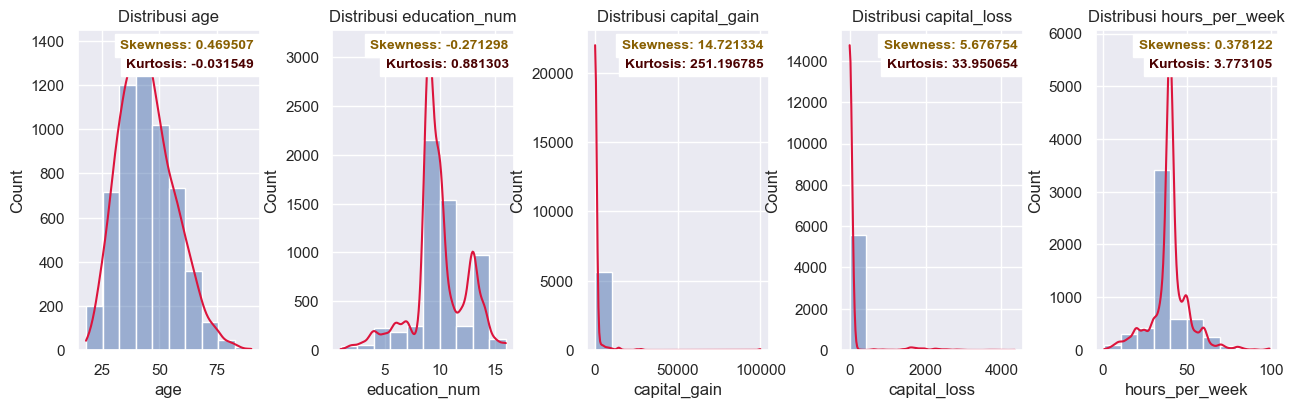

In [50]:
titles = []
for i in range(len(num_col)):
    titles.append('Distribusi ' + num_col[i])
x=0
# plot distribusi fitur distance, surge_multiplier, dan price
len_num_row=1
len_num_col=len(num_col)
fig, axes= plt.subplots(1,5, figsize=(15,4))


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.8)
for i in range(5):
    sns.histplot(ax=axes[i], data=df_no_dupl[num_col[i]], kde=True, bins=10)
    axes[i].set_title(titles[x])
    axes[i].lines[0].set_color('crimson')
    axes[i].text(x=0.97, y=0.97, transform=axes[i].transAxes, s="Skewness: %f" % df_no_dupl[num_col[i]].skew(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
    backgroundcolor='white', color='xkcd:poo brown')
    axes[i].text(x=0.97, y=0.91, transform=axes[i].transAxes, s="Kurtosis: %f" % df_no_dupl[num_col[i]].kurt(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
    backgroundcolor='white', color='xkcd:dried blood')
    x+=1

Age, education_num, hours_per_week memiliki sebaran data normal. Capital_gain dan capital_loss memiliki sebaran data yang miring.

## Feature Selection

### Phi_K Correlation Test

interval columns not set, guessing: ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


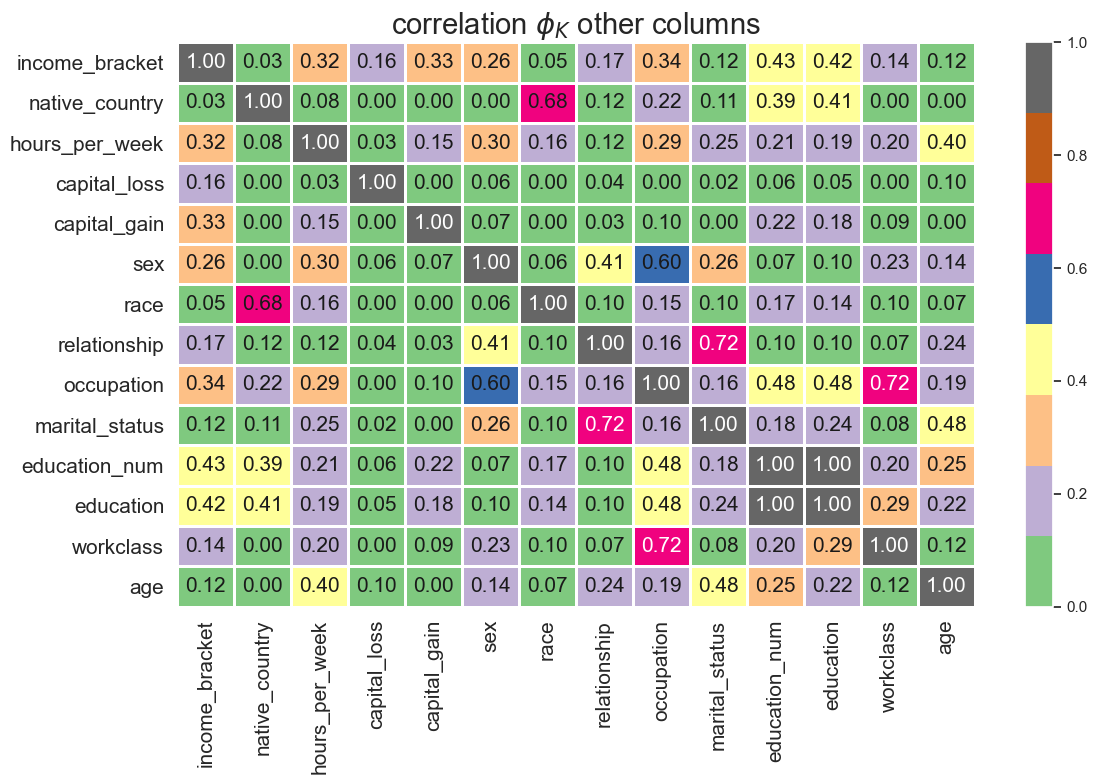

In [51]:
# get the phi_k correlation matrix between all variables
phik_matrix = df_no_dupl.phik_matrix()
plot_correlation_matrix(phik_matrix.values, 
                        x_labels=phik_matrix.columns, 
                        y_labels=phik_matrix.index, 
                        vmin=0, vmax=1, color_map="Accent", 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1.5, 
                        figsize=(12,8))
plt.tight_layout()
# sns.heatmap(phik_matrix, annot= True, vmin=0, vmax=1, cmap='Accent', figsize=(12,8))

In [52]:
# cek korelasi yang memiliki signifikansi terhadap income_bracket
df_no_dupl.phik_matrix().income_bracket.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


income_bracket    1.000000
education_num     0.429918
education         0.424844
occupation        0.344514
capital_gain      0.330230
hours_per_week    0.317885
sex               0.256169
relationship      0.171859
capital_loss      0.163503
workclass         0.136272
marital_status    0.121843
age               0.121246
race              0.051828
native_country    0.028747
Name: income_bracket, dtype: float64

Fitur yang berkorelasi paling kuat dengan target adalah education_num

In [53]:
# drop fitur yang korelasinya rendah terhadap target
dropped_features =['race','native_country']

Dari nilai korelasinya, penulis mencurigai kesamaan education dan education_num, maka dari itu penulis mencoba meninjau lebih jauh value dari kedua fitur tersebut.

In [54]:
np.sort(df_no_dupl.education_num.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [55]:
df_no_dupl.education.unique()

array([' HS-grad', ' Assoc-voc', ' Bachelors', ' Assoc-acdm',
       ' Some-college', ' 9th', ' 10th', ' 11th', ' 12th', ' 1st-4th',
       ' 5th-6th', ' 7th-8th', ' Masters', ' Doctorate', ' Preschool',
       ' Prof-school'], dtype=object)

In [56]:
df_no_dupl.education.nunique()

16

In [57]:
df_no_dupl[['education','education_num']].value_counts()

education      education_num
 HS-grad       9                2149
 Some-college  10               1248
 Bachelors     13                689
 Assoc-voc     11                293
 Masters       14                288
 Assoc-acdm    12                246
 11th          7                 194
 10th          6                 180
 7th-8th       4                 129
 9th           5                 100
 Prof-school   15                 66
 12th          8                  55
 5th-6th       3                  46
 Doctorate     16                 46
 1st-4th       2                  32
 Preschool     1                   4
dtype: int64

Sepertinya fitur education_num adalah representasi numerik dari fitur education yang sudah di encode dengan ordo/tingkatan. Oleh karena itu penulis akan mendrop salah satunya.

In [58]:
dropped_features.append('education')

In [59]:
df_no_dupl.drop(columns=dropped_features,inplace=True)

/var/folders/lv/63lr74g926b4flfb_7npy3m40000gn/T/ipykernel_56645/2572748032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dupl.drop(columns=dropped_features,inplace=True)


In [60]:
df_no_dupl.duplicated().sum() #cek data duplikat setelah feature selection

97

In [61]:
df_feature_selected = df_no_dupl.drop_duplicates() # drop data duplikat

In [62]:
df_feature_selected.duplicated().sum() # cek data duplikat

0

In [63]:
df_feature_selected.head(3) # final feature

,age,workclass,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,income_bracket
0,27,Private,9,Married-AF-spouse,Craft-repair,Husband,Male,0,0,40,>50K
1,47,Self-emp-not-inc,9,Married-AF-spouse,Craft-repair,Husband,Male,0,0,90,<=50K
2,29,Private,9,Married-AF-spouse,Transport-moving,Husband,Male,0,0,80,<=50K


# Data Preprocessing
## Train-Test Split

In [64]:
#split antara fitur dan target
X = df_feature_selected.drop('income_bracket',axis=1)
y = df_feature_selected['income_bracket']

In [65]:
#split antara train dan test dengan cara stratifikasi
X_train,X_test, y_train, y_test= train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (4534, 10)
test size: (1134, 10)


In [66]:
X_train.head()

,age,workclass,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week
4399,38,Private,10,Divorced,Exec-managerial,Not-in-family,Male,0,0,50
2692,37,Private,9,Divorced,Machine-op-inspct,Not-in-family,Female,0,0,40
1288,39,Local-gov,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40
1403,58,Private,9,Divorced,Sales,Not-in-family,Male,0,0,36
897,31,Private,5,Divorced,Adm-clerical,Not-in-family,Female,0,0,40


In [67]:
y_train.head()

4399     <=50K
2692     <=50K
1288      >50K
1403     <=50K
897      <=50K
Name: income_bracket, dtype: object

In [68]:
num_col = X_train.columns[X_train.dtypes!='object'].to_list() # fitur numerical
num_col

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [69]:
cat_col = X_train.columns[X_train.dtypes=='object'].to_list() # fitur numerical
cat_col

['workclass', 'marital_status', 'occupation', 'relationship', 'sex']

## Outlier Handling

In [70]:
# fungsi untuk membuat histogram dan boxplot dari sebuah fitur
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=10)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable],whis=3)
    plt.title('Boxplot')

    plt.show()

In [71]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

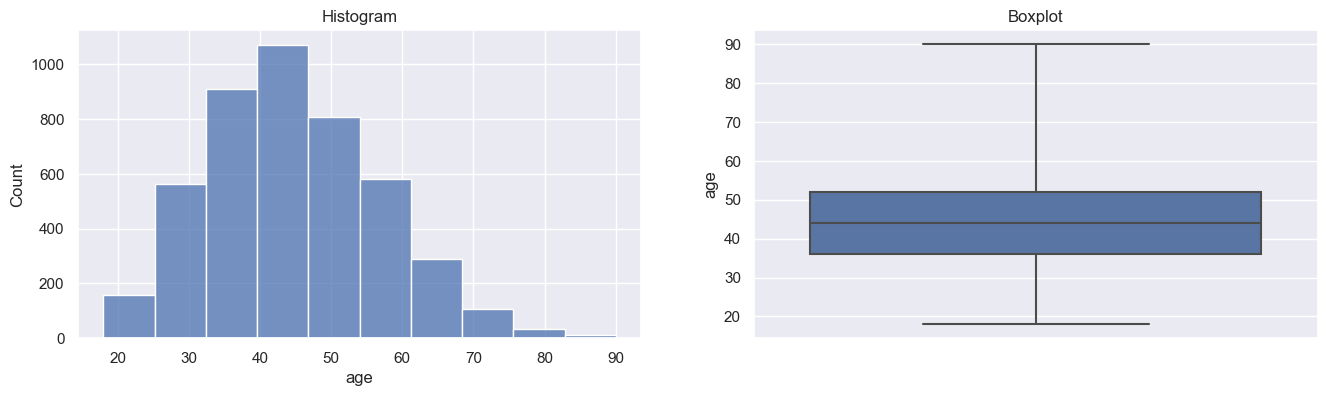


Skewness Value :  0.45049731637945567


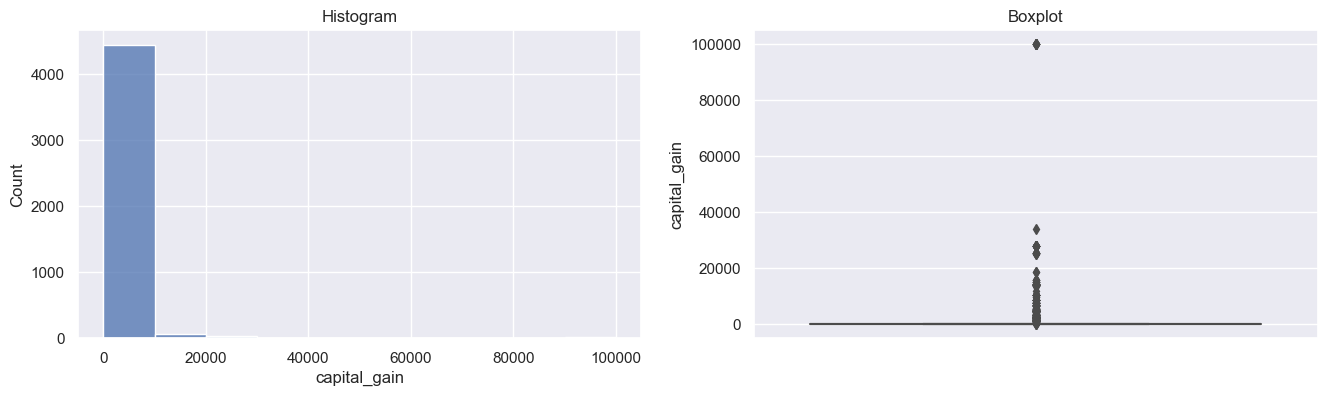


Skewness Value :  15.075743998284825


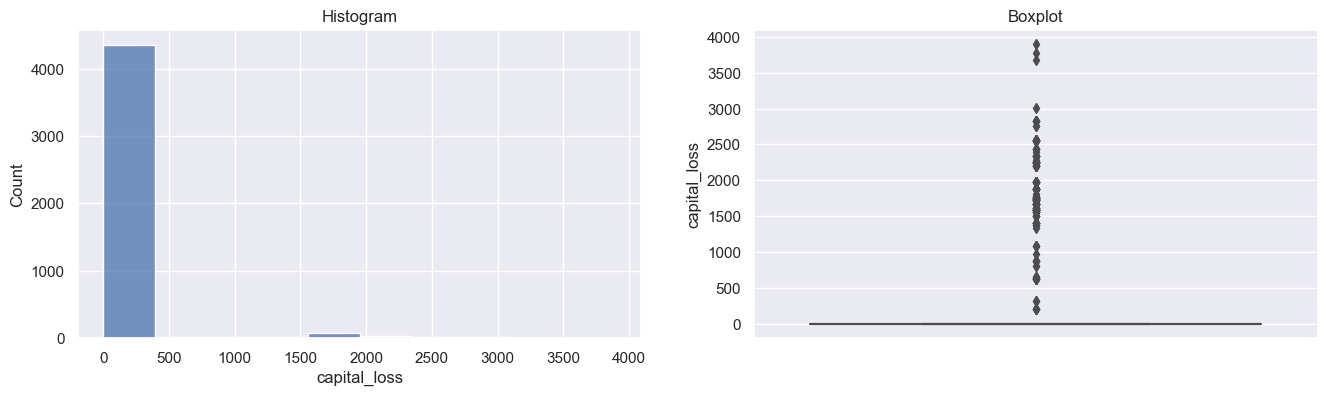


Skewness Value :  5.560534833887995


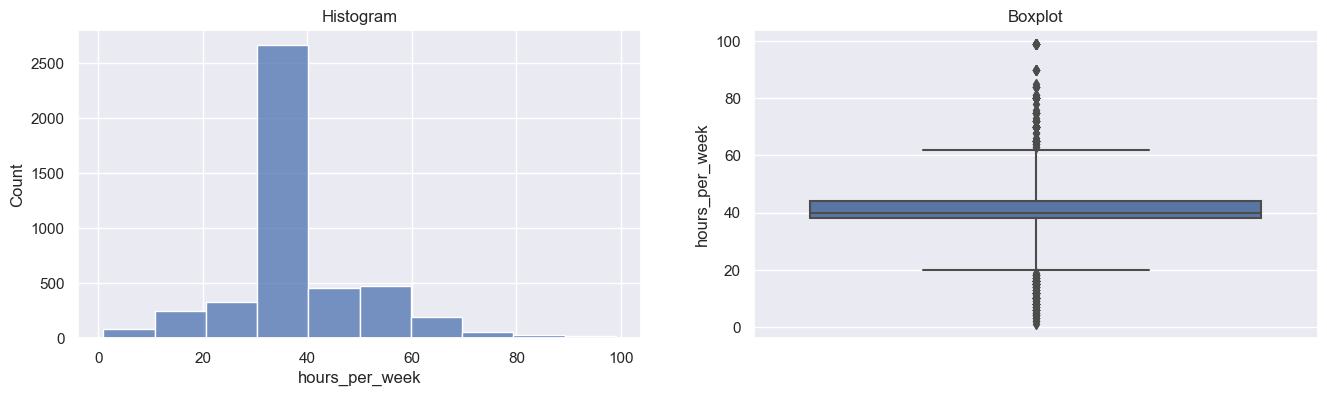


Skewness Value :  0.37684258481762967


In [72]:
# plot histogram dan boxplot untuk melihat outlier
for i in range(len(num_col)):
    if num_col[i]=='education_num': #skip fitur education_num karena termasuk fitur kategorikal yang sudah di encode
        continue
    diagnostic_plots(X_train, num_col[i])
    print('\nSkewness Value : ', X_train[num_col[i]].skew())

Outlier tedapat pada beberapa fitur seperti capital_gain, capital_loss, dan hours_per_week.

In [73]:
# variable container upper dan lower limit semua kolom numerik
upper = []
lower = []

In [74]:
for i in range(len(num_col)):
    upper_, lower_ = find_skewed_boundaries(df=X_train, variable=num_col[i], distance=1.5)
    upper.append(upper_)
    lower.append(lower_)

In [75]:
up_low_dict = {}
for i in range(len(num_col)):
    up_low_dict[num_col[i]]=[lower[i],upper[i]]

In [76]:
up_low_dict

{'age': [12.0, 76.0],
 'education_num': [6.0, 14.0],
 'capital_gain': [0.0, 0.0],
 'capital_loss': [0.0, 0.0],
 'hours_per_week': [29.0, 53.0]}

In [77]:
up_low_dict['age'][1]

76.0

upper dan lower value dari fitur capital_gain dan capital_loss bernilai singular. Jika value diluar nilai ini di drop atau di cap maka fitur ini tidak memberikan insight apa-apa terhadap training bahkan tidak berbeda dengan kolom yang tidak unik. Sementara dari nilai korelasi, kedua fitur ini relatif cukup signinikan berpengaruh terhadap fitur target dibanding fitur-fitur lainnya. Dalam kasus ini penulis memptertimbangkan untuk tidak menghandle outlier pada kedua fitur ini.<br><br>
Fitur education_num juga tidak akan di handle dikarenakan sebenarnya fitur tersebut adalah representasi fitur education yang sudah di encode.

In [78]:
for i in range(len(num_col)):
    num_outlier = X_train[num_col[i]][(X_train[num_col[i]] > upper[i]) | (X_train[num_col[i]] < lower[i])].shape[0]
    if num_col[i]=='age' or num_col[i]=='hours_per_week':
        print(f'Percentage of outlier in {num_col[i]} is {num_outlier/X_train.shape[0]*100:.2f}%')

Percentage of outlier in age is 0.73%
Percentage of outlier in hours_per_week is 19.94%


Persentasi outlier pada age relatif cukup kecil sementara outier pada fitur hours_per_week cukup besar maka untuk age dapat dilakukan trimming dan untuk hours_per_week dapat dilakukan censoring/capping.

In [79]:
outlier_age_index = X_train.age[(X_train.age < up_low_dict['age'][0]) | (X_train.age > up_low_dict['age'][1])].index

In [80]:
# Create the capper
windsoriser = Winsorizer(capping_method='gaussian',
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['hours_per_week'])

windsoriser.fit(X_train)

X_train = windsoriser.transform(X_train)

Teknik censoring yang digunakan adalah winsorizing dengan metode capping gaussian karena fitur hours_per_week memiliki distribusi normal.

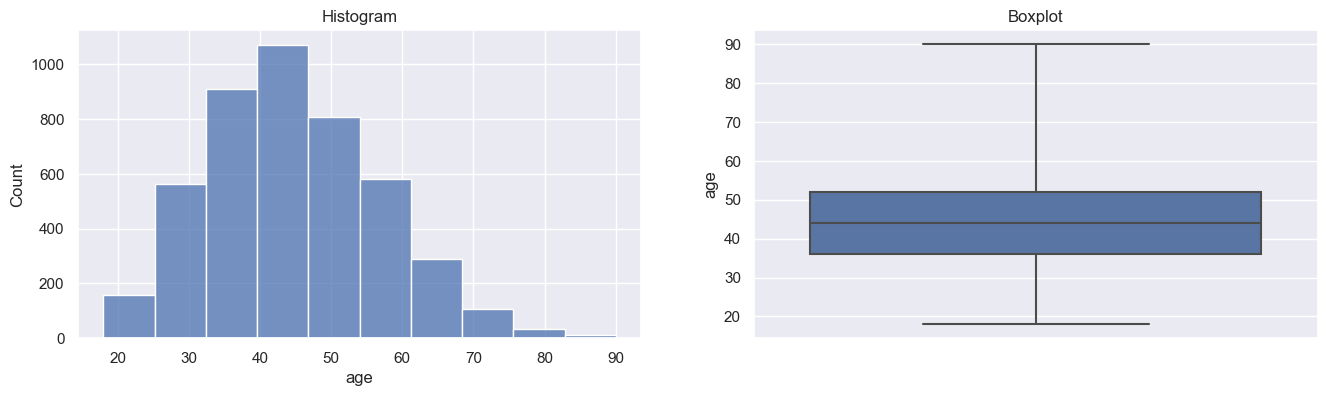


Skewness Value :  0.45049731637945567


In [81]:
# fitur age setelah dilakukan trimming
diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

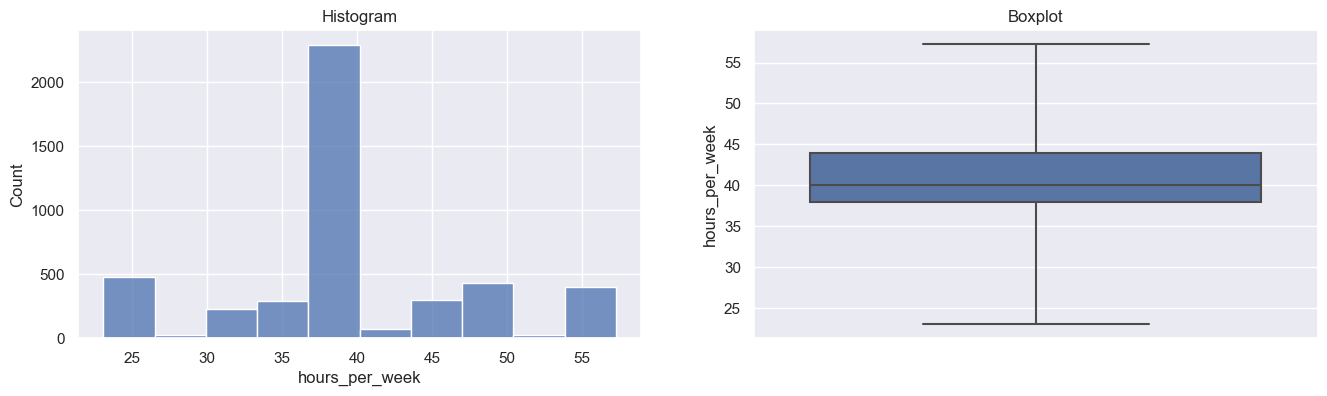


Skewness Value :  -0.07104379254248978


In [82]:
# fitur hours_per_week setelah dilakukan capping
diagnostic_plots(X_train, 'hours_per_week')
print('\nSkewness Value : ', X_train['hours_per_week'].skew())

## Scaling

In [83]:
scaled_num_col = ['age','capital_gain','capital_loss','hours_per_week']
X_train[scaled_num_col]

,age,capital_gain,capital_loss,hours_per_week
4399,38,0,0,50.000000
2692,37,0,0,40.000000
1288,39,0,0,40.000000
1403,58,0,0,36.000000
897,31,0,0,40.000000
...,...,...,...,...
5364,43,0,0,40.000000
3801,39,0,0,57.252941
3356,40,0,0,57.252941
1779,55,0,0,45.000000


Untuk fitur numerikal, penulis akan menggunakan scaling dengan standard scaler sebagai tekniknya, dengan pertimbangan fitur age dan hours_per_week terdistribusi secara normal.

In [84]:
# instansiasi scaler
std_scaler= StandardScaler()

# melakukan stardardisasi data train
X_train[scaled_num_col]= std_scaler.fit_transform(X_train[scaled_num_col])
X_train[scaled_num_col].head(5) #menampilkan fitur setelah scaling

,age,capital_gain,capital_loss,hours_per_week
4399,-0.556917,-0.136717,-0.19041,1.167059
2692,-0.640063,-0.136717,-0.19041,-0.015170
1288,-0.473771,-0.136717,-0.19041,-0.015170
1403,1.106003,-0.136717,-0.19041,-0.488062
897,-1.138939,-0.136717,-0.19041,-0.015170


In [85]:
# melakukan stardardisasi data test
X_test[scaled_num_col]= std_scaler.transform(X_test[scaled_num_col])

## Encoding

In [86]:
X_train[cat_col]

,workclass,marital_status,occupation,relationship,sex
4399,Private,Divorced,Exec-managerial,Not-in-family,Male
2692,Private,Divorced,Machine-op-inspct,Not-in-family,Female
1288,Local-gov,Divorced,Handlers-cleaners,Not-in-family,Male
1403,Private,Divorced,Sales,Not-in-family,Male
897,Private,Divorced,Adm-clerical,Not-in-family,Female
...,...,...,...,...,...
5364,Private,Separated,Transport-moving,Unmarried,Male
3801,Private,Divorced,Exec-managerial,Unmarried,Female
3356,Private,Divorced,Sales,Own-child,Male
1779,Private,Divorced,Craft-repair,Not-in-family,Male


Untuk fitur kategorical, penulis akan menggunakan teknik one-hot encoding dengan pertimbangan tidak adanya ordo atau tingkatan dalam fitur kategorikalnya.

In [87]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_ohe = enc.fit_transform(X_train[cat_col])
X_train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [88]:
X_train[cat_col].head(3) # crosscheck data train sebelum di encode

,workclass,marital_status,occupation,relationship,sex
4399,Private,Divorced,Exec-managerial,Not-in-family,Male
2692,Private,Divorced,Machine-op-inspct,Not-in-family,Female
1288,Local-gov,Divorced,Handlers-cleaners,Not-in-family,Male


In [89]:
# X_train setelah di encode
feature_names = enc.get_feature_names_out(input_features=cat_col)
X_train_ohe = pd.DataFrame(X_train_ohe, columns=feature_names)
X_train_ohe.head(3)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
X_test[cat_col].head(3) # crosscheck data train sebelum di encode

,workclass,marital_status,occupation,relationship,sex
4028,Private,Divorced,Other-service,Unmarried,Female
2739,Local-gov,Divorced,Adm-clerical,Not-in-family,Female
4979,Federal-gov,Divorced,Exec-managerial,Not-in-family,Female


In [91]:
# X_test
X_test_ohe = enc.transform(X_test[cat_col]) #transform only
X_test_ohe = pd.DataFrame(X_test_ohe, columns=feature_names)
X_test_ohe.head(3)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Concatenate Numerical and Categorical Features

In [92]:
#reset index data train & test sebelum di concat
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True) 

In [93]:
# X_train numeric only
X_train_num = X_train.drop(columns=cat_col) #drop kolom categorical yang belum di encode

# X_test numeric only
X_test_num = X_test.drop(columns=cat_col) #drop kolom categorical yang belum di encode

In [94]:
# X_train numeric + encoded categorical
X_train_final = pd.concat([X_train_num,X_train_ohe],axis=1)

# X_test numeric + encoded categorical
X_test_final = pd.concat([X_test_num,X_test_ohe],axis=1) 

In [95]:
X_train_final.head(3) #data train final dengan outlier handling + fit_transform()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,-0.556917,10,-0.136717,-0.19041,1.167059,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.640063,9,-0.136717,-0.19041,-0.015170,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.473771,9,-0.136717,-0.19041,-0.015170,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
X_test_final.head(3) #data test final tanpa outlier handling & transform only

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,-0.806355,12,-0.136717,-0.19041,1.167059,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.607127,9,-0.136717,-0.19041,0.575945,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.390625,10,-0.136717,-0.19041,-0.015170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model Definition
Model yang penulis gunakan adalah logistic regression dan SVR, dengan alasan kedua model ini dapat digunakan untuk klasifikasi.<br> 

In [97]:
# instansiasi model regresi logistik
log_model = LogisticRegression(max_iter=100000)

# instansiasi model SVR
rbf_svc = SVC(kernel="rbf", C=50)

# Model Training
Fit model logistic dan SVC terhadap data train

In [98]:
log_model.fit(X_train_final, y_train)

LogisticRegression(max_iter=100000)

In [99]:
rbf_svc.fit(X_train_final, y_train)

SVC(C=50)

# Model Evaluation

Berikut merupakan evaluasi dari performa model yang telah di train. Dengan pertimbangan data yang imbalance, maka score akurasi tidak terlalu cocok  digunakan meskipun upaya pencegahan class imbalance seperti dilakukannya stratify ketika splitting data train-test sudah dilakukan. Kedua, urgensi untuk meminimalisir prediksi *False Positive* dan *False Negative* tidak ada karena konteks target datanya penggolongan income. Dari pertimbangan diatas maka penulis menitik beratkan pada metrik F1-Score/kombinasi harmonik dari precision dan recall.

In [100]:
y_pred_train = log_model.predict(X_train_final)
y_pred_test = log_model.predict(X_test_final)

In [101]:
print('Logistic Regression')
print('accuracy train score : ',accuracy_score(y_train,y_pred_train))
print('accuracy test score : ',accuracy_score(y_test,y_pred_test))

Logistic Regression
accuracy train score :  0.9208204675782973
accuracy test score :  0.9126984126984127


Hasil train dan test tidak terpaut jauh, sepertinya model logits ini tergolong good fit.

In [102]:
y_pred_train_svc = rbf_svc.predict(X_train_final)
y_pred_test_svc = rbf_svc.predict(X_test_final)

In [103]:
print('SVC')
print('accuracy train score : ',accuracy_score(y_train,y_pred_train_svc))
print('accuracy test score : ',accuracy_score(y_test,y_pred_test_svc))

SVC
accuracy train score :  0.9276576973974415
accuracy test score :  0.9188712522045855


Hasil train dan test model SVR juga tidak terpaut jauh, sepertinya tergolong good fit.

### Confusion Matrix
#### Logistic Model

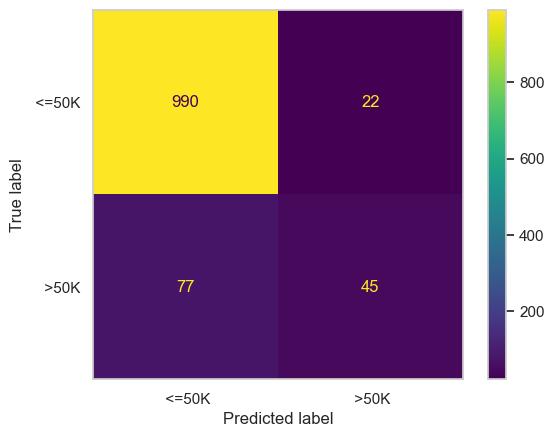

In [104]:
# logistic model confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

Hasil true positive sebanyak 990, false positive sebanyak 22, false negative sebanyak 77, dan true negative sebanyak 45. 

#### SVC Model

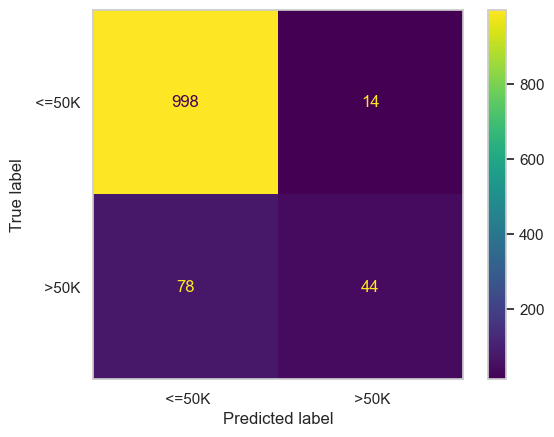

In [105]:
# svr model confusion matrix
cm = confusion_matrix(y_test, y_pred_test_svc, labels=rbf_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rbf_svc.classes_)

disp.plot()
plt.show()

Hasil true positive sebanyak 998, false positive sebanyak 14, false negative sebanyak 78, dan true negative sebanyak 44. 

### Logistic Model Report

In [106]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

       <=50K       0.93      0.99      0.96      4048
        >50K       0.80      0.35      0.48       486

    accuracy                           0.92      4534
   macro avg       0.86      0.67      0.72      4534
weighted avg       0.91      0.92      0.91      4534



Pada train-set, model logistik mendapatkan F1-Score sebesar 0.48 atau 48% untuk kelas income >50k meskipun precision mendapat score 0.8 namun nilai recallnya cukup rendah yaitu 0.35 yang artinya model masih banyak memiliki prediksi false negative atau kategori income yang harusnya diatas 50k malah digolongkan ke dalam kelas <= 50k. Untuk kelas income <= 50k F1-score tergolong cukup baik yakni mencapai score 0.96 atau 96% yang artinya prediksi untuk kelas income <=50k tidak banyak memiliki False Negative dan False Positive.

In [107]:
print(classification_report(y_test,y_pred_test))    

              precision    recall  f1-score   support

       <=50K       0.93      0.98      0.95      1012
        >50K       0.67      0.37      0.48       122

    accuracy                           0.91      1134
   macro avg       0.80      0.67      0.71      1134
weighted avg       0.90      0.91      0.90      1134



Pada test-set, model logistik juga mendapatkan F1-Score sebesar 0.48 atau 48% untuk kelas income >50k hal ini disebabkan kedua nilai precision dan recallnya yang juga relatif rendah yakni 0.67 dan 0.37 artinya model ini banyak memiliki kesalahan prediksi untuk kelas income >50k namun sangat baik ketika memprediksi kelas income <= 50k

### SVC Model Report

In [108]:
print(classification_report(y_train,y_pred_train_svc))

              precision    recall  f1-score   support

       <=50K       0.93      1.00      0.96      4048
        >50K       0.92      0.35      0.51       486

    accuracy                           0.93      4534
   macro avg       0.93      0.68      0.74      4534
weighted avg       0.93      0.93      0.91      4534



Pada train-set, model SVC mendapatkan F1-Score sebesar 0.51 atau 51% untuk kelas income >50k. Precision score yang didapat cukup besar yaitu 0.92 namun sangat timpang dengan recallnya yakni 0.35 dimana prediksi banyak false negatifnya. Untuk prediksi kelas <=50k cukup baik yakni mendapat 0.96 atau 96% dengan nilai recall yang sempurna yakni 1.0 atau 100%.

In [109]:
print(classification_report(y_test,y_pred_test_svc))

              precision    recall  f1-score   support

       <=50K       0.93      0.99      0.96      1012
        >50K       0.76      0.36      0.49       122

    accuracy                           0.92      1134
   macro avg       0.84      0.67      0.72      1134
weighted avg       0.91      0.92      0.91      1134



Pada test-set, model SVC mendapatkan F1-Score sebesar 0.49 atau 49% untuk kelas income >50k dan 0.96 atau 96% untuk prediksi income <=50k. Artinya model ini bagus dalam memprediksi kelas income <=50k (kelas mayoritas) dan kurang bagus dalam memprediksi kelas >50k (kelas minoritas). Dari semua classification report, terlihat adanya konsistensi bahwa kedua model bagus dalam memprediksi kelas income <=50k dan buruk dalam memprediksi kelas income >50k. Penulis merasa bahwa efek class imbalance cukup signifikan dalam mendapatkan model yang optimal.

# Model Saving

In [110]:
# save model
with open('model_log.pkl','wb') as file_1:
    joblib.dump(log_model,file_1)

with open('model_svc.pkl','wb') as file_2:
    joblib.dump(log_model,file_2)

with open('model_scaler.pkl','wb') as file_3:
    joblib.dump(std_scaler,file_3)

with open('model_encoder.pkl','wb') as file_4:
    joblib.dump(enc,file_4)

with open('list_num_cols.txt','wb') as file_5:
    joblib.dump(num_col,file_5)

with open('list_scaled_num_cols.txt','wb') as file_6:
    joblib.dump(scaled_num_col,file_6)

with open('list_cat_cols.txt','wb') as file_7:
    joblib.dump(cat_col,file_7)

# Conceptual Problems
1. Apakah yang dimaksud dengan coeficient pada logistic regression?
> Koefisien pada logistic regression adalah bobot atau pengaruh seberapa besar suatu fitur terhadap target kelas prediksi.
2. Apakah yang dimaksud dengan Support Vector pada SVM?
> Support vector adalah data point terdekat ke decision surface atau hyperplane. [sumber](https://web.mit.edu/6.034/wwwbob/svm.pdf)
3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!
> fungsi parameter kernel pada SVM adalah sebagai transformer data point linier menjadi representasi non-linier (representasi data pada dimensi yang lain atau lebih tinggi). Kernel juga membantu untuk menentukan bentuk hyperplane atau decision boundary. Contoh satu kernel yaitu 'poly' dimana kernel poly akan mentransformasikan data point menjadi representasi polynomial sehingga hyperplane yang terbentuk nantinya menjadi garis yang meliuk.  [sumber ini](https://www.youtube.com/watch?v=Q7vT0--5VII) dan [ini](https://techvidvan.com/tutorials/svm-kernel-functions/) 

# Conclusion
- Teknik Logistic Regression dan SVM dapat digunakan untuk prediksi klasifikasi
- Data Preprocessing merupakan hal yang wajib dilakukan sebelum data di feed ke dalam model
- Penentuan hyperparameter pada model memengaruhi kualitas hasil model tersebut
- Metrik akurasi tidak cocok diterapkan pada dataset dengan class imbalance
- Metrik precision cocok digunakan untuk konteks data yang memiliki urgensi untuk menekan angka false positive.
- Metrik recall cocok digunakan untuk konteks data yang memiliki urgensi untuk menekan angka false negative.
- Metrik F1-score cocok digunakan untuk data yang memiliki class imbalance.
- Dari kedua model dengan hyperparameter diatas, F1-score yang didapatkan pada test-set tidak berbeda secara signifikan (95,48 logits vs 96,49 SVC), dapat dikatakan kedua model memiliki performa prediksi yang sama.
- Class imbalance memiliki efek ketimpangan prediksi yang condong pada kelas mayoritas daripada kelas minoritas.

# Further Improvement
- Perlu adanya class imbalance handling sebelum dilakukannya proses training
- Eksplorasi classifier lainnya dan penggunaan pipeline, hyperparameter tuning, dan cross validation mungkin dapat membantu menaikkan performa model.
